# SCANIA APS FAILURE DATASET

## Abhishek Kumar Singh

### EDA + FE
1. Data Profiling
2. Stats Analysis
3. Missing Value handle
4. Graphical Analysis
5. Handling Unbalanced Data
6. Scaling

**DataSet** : https://archive.ics.uci.edu/ml/datasets/APS+Failure+at+Scania+Trucks

**About the dataset**  
The training dataset consists of 60,000 datapoints and 171 features, of which one is the class label. The features are a combination of numerical data and histogram bins data. The feature names are kept anonymized for proprietary reasons. 59,000 data points belong to the negative class and the remaining 1,000 belong to the positive class.


**ML Formulation**  
This is a Binary Classification problem where the positive class tells us that the failure was due to a specific component of the APS, whereas, the negative class tells us that the failure has nothing to do with that component.

Therefore, given a new datapoint (sensor information), we must build a model that would tell us if the failure was due to APS or not. If the model misses an APS failure, it may prove to be detremental during operation.



# Importing Required Packages

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import Ridge
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

## Reading Data through G-Drive

In [4]:
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
 
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [5]:
link = 'https://drive.google.com/file/d/1cNdY8rucAeviqdnqWSfjcImpb2k-0JZT/view?usp=share_link'
 
import pandas as pd
 
# to get the id part of the file
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('aps_failure_data.csv') 


In [6]:
df = pd.read_csv("aps_failure_data.csv",skiprows=19,na_values=['na'])

In [7]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,0.0,2551696.0,0.0,0.0,0.0,0.0,0.0,4933296.0,3655166.0,1766008.0,1132040.0,0.0,0.0,0.0,0.0,1012.0,268.0,0.0,0.0,0.0,0.0,0.0,469014.0,4239660.0,703300.0,755876.0,0.0,5374.0,2108.0,4114.0,12348.0,615248.0,5526276.0,2378.0,4.0,0.0,0.0,2328746.0,1022304.0,415432.0,287230.0,310246.0,681504.0,1118814.0,3574.0,0.0,0.0,6700214.0,0.0,10.0,108.0,50.0,2551696.0,97518.0,947550.0,799478.0,330760.0,353400.0,299160.0,305200.0,283680.0,NaN,NaN,NaN,178540.0,76698.08,6700214.0,6700214.0,6599892.0,43566.0,68656.0,54064.0,638360.0,6167850.0,1209600.0,246244.0,2.0,96.0,0.0,5245752.00,0.0,916567.68,6.0,1924.0,0.0,0.0,0.0,118196.0,1309472.0,3247182.0,1381362.0,98822.0,11208.0,1608.0,220.0,240.0,6700214.0,NaN,10476.0,1226.0,267998.0,521832.0,428776.0,4015854.0,895240.0,26330.0,118.0,0.0,532.0,734.0,4122704.0,51288.0,0.0,532572.0,0.0,18.0,5330690.0,4732.0,1126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62282.0,85908.0,32790.0,0.0,0.0,202710.0,37928.0,14745580.0,1876644.0,0.0,0.0,0.0,0.0,2801180.0,2445.80,2712.0,965866.0,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,653294.0,1720800.0,516724.0,31642.0,0.0,1393352.0,0.0,68.0,0.0,0.0,0.0,2560898.0,2127150.0,1084598.0,338544.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71510.0,772720.0,1996924.0,99560.0,0.0,7336.0,7808.0,13776.0,13086.0,1010074.0,1873902.0,14726.0,6.0,0.0,0.0,1378576.0,447166.0,199512.0,154298.0,137280.0,138668.0,165908.0,229652.0,87082.0,4708.0,3646660.0,86.0,454.0,364.0,350.0,1393352.0,49028.0,688314.0,392208.0,341420.0,359780.0,366560.0,NaN,NaN,NaN,NaN,NaN,6700.0,33057.51,3646660.0,3646660.0,3582034.0,17733.0,260120.0,115626.0,6900.0,2942850.0,1209600.0,0.0,NaN,NaN,NaN,2291079.36,0.0,643536.96,0.0,0.0,0.0,0.0,38.0,98644.0,1179502.0,1286736.0,336388.0,36294.0,5192.0,56.0,NaN,0.0,3646660.0,NaN,6160.0,796.0,164860.0,350066.0,272956.0,1837600.0,301242.0,9148.0,22.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3312.0,522.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33736.0,36946.0,5936.0,0.0,0.0,103330.0,16254.0,4510080.0,868538.0,0.0,0.0,0.0,0.0,3477820.0,2211.76,2334.0,664504.0,824154.0,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,370592.0,1883374.0,292936.0,12016.0,0.0,1234132.0,0.0,0.0,0.0,0.0,0.0,2371990.0,2173634.0,300796.0,153698.0,0.0,0.0,0.0,0.0,358.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,870456.0,239798.0,1450312.0,0.0,1620.0,1156.0,1228.0,34250.0,1811606.0,710672.0,34.0,0.0,0.0,0.0,790690.0,672026.0,332340.0,254892.0,189596.0,135758.0,103552.0,81666.0,46.0,0.0,2673338.0,128.0,202.0,576.0,4.0,1234132.0,28804.0,160176.0,139730.0,137160.0,13064

In [8]:
df.shape

(60000, 171)

In [9]:
df.dtypes

class      object
aa_000      int64
ab_000    float64
ac_000    float64
ad_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 171, dtype: object

In [10]:
data = df.copy()

## Basic Pre-Processing

### Class Label Encode

In [46]:
## Encoding Class feature 
data['class'] = data['class'].replace(['neg','pos'],[0,1])

In [12]:
data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,0.0,2551696.0,0.0,0.0,0.0,0.0,0.0,4933296.0,3655166.0,1766008.0,1132040.0,0.0,0.0,0.0,0.0,1012.0,268.0,0.0,0.0,0.0,0.0,0.0,469014.0,4239660.0,703300.0,755876.0,0.0,5374.0,2108.0,4114.0,12348.0,615248.0,5526276.0,2378.0,4.0,0.0,0.0,2328746.0,1022304.0,415432.0,287230.0,310246.0,681504.0,1118814.0,3574.0,0.0,0.0,6700214.0,0.0,10.0,108.0,50.0,2551696.0,97518.0,947550.0,799478.0,330760.0,353400.0,299160.0,305200.0,283680.0,NaN,NaN,NaN,178540.0,76698.08,6700214.0,6700214.0,6599892.0,43566.0,68656.0,54064.0,638360.0,6167850.0,1209600.0,246244.0,2.0,96.0,0.0,5245752.00,0.0,916567.68,6.0,1924.0,0.0,0.0,0.0,118196.0,1309472.0,3247182.0,1381362.0,98822.0,11208.0,1608.0,220.0,240.0,6700214.0,NaN,10476.0,1226.0,267998.0,521832.0,428776.0,4015854.0,895240.0,26330.0,118.0,0.0,532.0,734.0,4122704.0,51288.0,0.0,532572.0,0.0,18.0,5330690.0,4732.0,1126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62282.0,85908.0,32790.0,0.0,0.0,202710.0,37928.0,14745580.0,1876644.0,0.0,0.0,0.0,0.0,2801180.0,2445.80,2712.0,965866.0,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,653294.0,1720800.0,516724.0,31642.0,0.0,1393352.0,0.0,68.0,0.0,0.0,0.0,2560898.0,2127150.0,1084598.0,338544.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71510.0,772720.0,1996924.0,99560.0,0.0,7336.0,7808.0,13776.0,13086.0,1010074.0,1873902.0,14726.0,6.0,0.0,0.0,1378576.0,447166.0,199512.0,154298.0,137280.0,138668.0,165908.0,229652.0,87082.0,4708.0,3646660.0,86.0,454.0,364.0,350.0,1393352.0,49028.0,688314.0,392208.0,341420.0,359780.0,366560.0,NaN,NaN,NaN,NaN,NaN,6700.0,33057.51,3646660.0,3646660.0,3582034.0,17733.0,260120.0,115626.0,6900.0,2942850.0,1209600.0,0.0,NaN,NaN,NaN,2291079.36,0.0,643536.96,0.0,0.0,0.0,0.0,38.0,98644.0,1179502.0,1286736.0,336388.0,36294.0,5192.0,56.0,NaN,0.0,3646660.0,NaN,6160.0,796.0,164860.0,350066.0,272956.0,1837600.0,301242.0,9148.0,22.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3312.0,522.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33736.0,36946.0,5936.0,0.0,0.0,103330.0,16254.0,4510080.0,868538.0,0.0,0.0,0.0,0.0,3477820.0,2211.76,2334.0,664504.0,824154.0,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,370592.0,1883374.0,292936.0,12016.0,0.0,1234132.0,0.0,0.0,0.0,0.0,0.0,2371990.0,2173634.0,300796.0,153698.0,0.0,0.0,0.0,0.0,358.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,870456.0,239798.0,1450312.0,0.0,1620.0,1156.0,1228.0,34250.0,1811606.0,710672.0,34.0,0.0,0.0,0.0,790690.0,672026.0,332340.0,254892.0,189596.0,135758.0,103552.0,81666.0,46.0,0.0,2673338.0,128.0,202.0,576.0,4.0,1234132.0,28804.0,160176.0,139730.0,137160.0,130640.0,Na

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 78.3+ MB


###Class Distribution

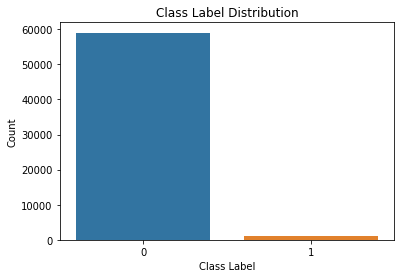

No. Of Positive is 1000
No. Of Negative is 59000


In [14]:
sns.barplot(data['class'].unique(),data['class'].value_counts())
plt.title('Class Label Distribution')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.show()

print('No. Of Positive is',data['class'].value_counts()[1])
print('No. Of Negative is',data['class'].value_counts()[0])

#### Insight
- Dataset is Highly imbalanced , we can do upsampling

### Checking for Single value feature

In [15]:
def constant_value(df):
  const_value = []
  info = df.describe()
  for col in df.columns:
    if info[col]['std']==0:
      const_value.append(col)
  df.drop(const_value,axis=1,inplace=True)
  return df ,const_value



data , dropped_features = constant_value(data)
print('The Features Dropped are :',dropped_features)
print('Shape of Data:', data.shape)

The Features Dropped are : ['cd_000']
Shape of Data: (60000, 170)


### Missing Value

In [16]:
##creating Dict. with keys as column name and value as percentage of missing
null_count = {k:list(data.isna().sum()*100/data.shape[0])[i] for i,k in enumerate(data.columns)}

## sorting dict. in descending order
null_count = {k:v for k ,v in sorted(null_count.items(),key=lambda item:item[1],reverse=True)}

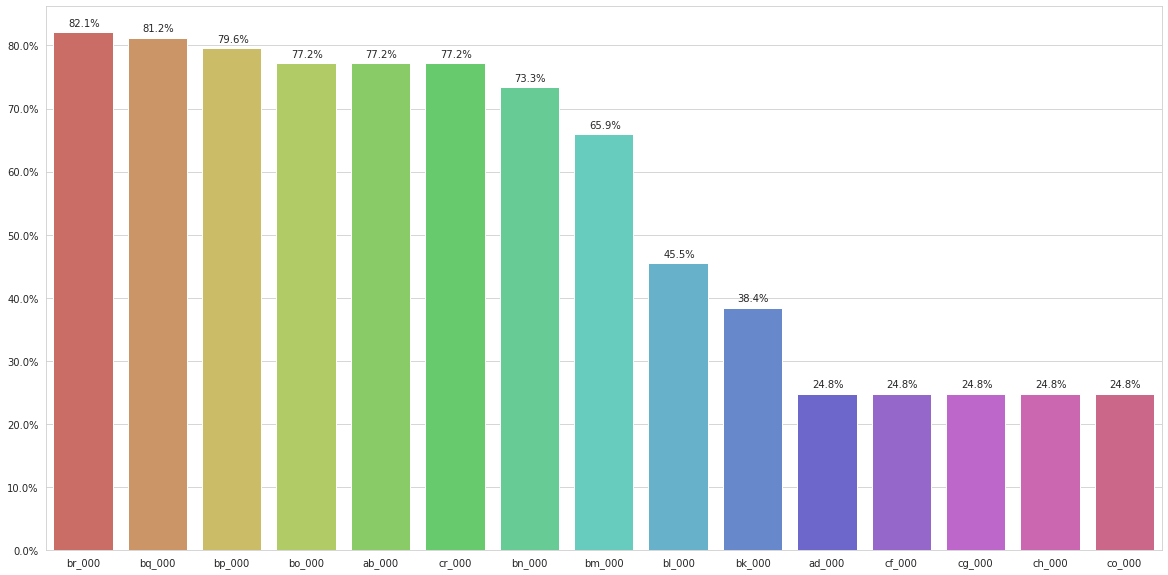

In [17]:
## PLoting Graph of top 15 highest missing values feature
sns.set_style(style="whitegrid")
plt.figure(figsize=(20,10))

# Bar Plot
plot = sns.barplot(x= list(null_count.keys())[:15],y = list(null_count.values())[:15],palette="hls")

# Add annotations above each bar signifying their value
for p in plot.patches:
        plot.annotate('{:.1f}%'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+1))

# Make y-axis more interpretable
plot.set_yticklabels(map('{:.1f}%'.format, plot.yaxis.get_majorticklocs())) 
plt.show()

####Insight
- Some feature have more than 50% of missing data

### Handling Missiing Value
- We will discard features having more than 70% missing value
- Features having less than 5%,we can drop those rows
- feature with missing value between 5-15%, we can impute mean/meadian
- For rest missing values , we will handle it by model bases imputation

####Dropping Feature and Rows

In [18]:
def remove_null(df,null_feat):

  #Removing Features having more than 70% NA
  df = df.dropna(axis=1,thresh=18000)

  #Removing rows having NA from above created list of features
  df = df.dropna(subset=null_feat)

  df = df.reset_index(drop=True)
  return df

print('Earlier Shape of Data is :',data.shape)

#list of features having less than 5% na
na_5 = [k for k ,v in null_count.items() if v<5]

data = remove_null(data,na_5)
print("Shape after removal of rows and columns:",data.shape)
print("Number of features having missing values below 5%:",len(na_5))


Earlier Shape of Data is : (60000, 170)
Shape after removal of rows and columns: (55973, 163)
Number of features having missing values below 5%: 128


In [47]:
#### Seperating Attribute and Class Label

In [19]:
X_train = data.drop('class',axis=1)
y_train = data['class']

In [20]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import Ridge

#### Imputing missing value

#### Model Based Imputaion / multivariate Imputation by Chained Equation

In [21]:
def impute_missing(df,mis_col):

  #using sklearn's SimpleImputer
  median_imputer = SimpleImputer(missing_values=np.NaN,strategy='median',copy=True)

  median_df = median_imputer.fit_transform(df[mis_col])
  df1 = df.copy()
  df1[mis_col] = median_df

  mice_imputer = IterativeImputer(estimator=Ridge(random_state=0),random_state=0)
  imputed_df = pd.DataFrame(data = mice_imputer.fit_transform(df1),columns = df1.columns)

  return imputed_df , median_imputer,mice_imputer


median_imputed = [k for k,v in null_count.items() if v>5 and v<15]

imputed_x_train , MEDIAN_imputer , MICE_imputer = impute_missing( X_train , median_imputed )
print("Number of features whose missing values are imputed with median are:\n",len(median_imputed))


Number of features whose missing values are imputed with median are:
 14


### Saving Pre-processed data

In [22]:
df_to_save = imputed_x_train.copy()
df_to_save['class'] = y_train
df_to_save.to_csv('Imputed_train_data.csv',index=False)


In [23]:
df = pd.read_csv('Imputed_train_data.csv')

In [24]:
df.isna().sum().sum()

0

In [25]:
df.shape

(55973, 163)

In [26]:
X = df.drop('class',axis=1)
y = df['class']

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [28]:
from collections import Counter

###  Seperating the two Types of features
It was given to us that certain features are histogram bin information, and the prefix (letter before the ' _ ') is the Identifier and the suffix is the bin_id.(Identifier_Bin)

To find the features that are contain histogram bin information, we know that all features from a single histogram have the same prefix.

In [29]:
def Identifier_Bin_count(x):
    """
    This function finds the identifiers
    and the number of bins in each identifier
    """
    prefix = []
    # For each feature name, find it's Identifier and count  
    for name in x.columns:
        prefix.append(name.split('_')[0])
    counter = Counter(prefix)
    return list(counter.keys()),list(counter.values())

feature_prefix , bin_count = Identifier_Bin_count(X_train)

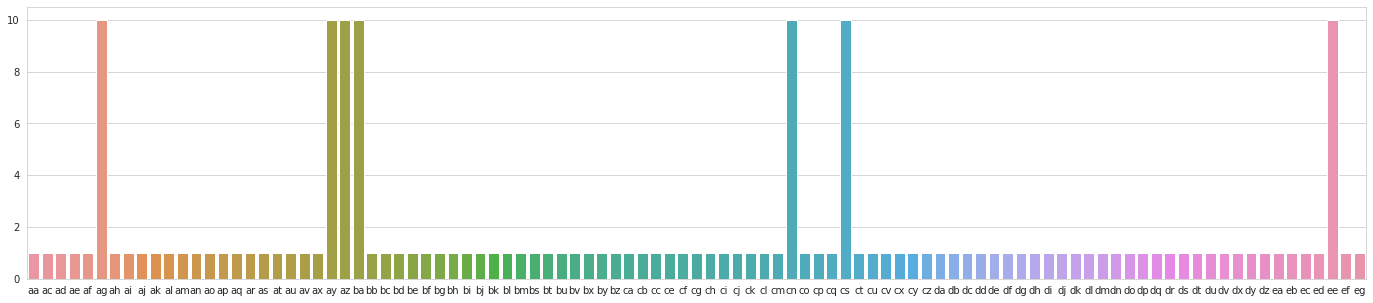

In [30]:
plt.figure(figsize=(24,5))
sns.barplot(x = feature_prefix,y = bin_count)
plt.show()

#### Insight
- There are 7 features having 10 bins each i.e 7 histograms divided into 10 bins each

In [31]:
##Geting Identifier of the Histogram
hist_identifier = [feature_prefix[i] for i,j in enumerate(bin_count) if j==10]
print("The Histogram Identifiers are: ",hist_identifier)

# Getting the names of the features having histograms bin information
hist_features = [i for i in X_train.columns if i.split('_')[0] in hist_identifier]
print("\nThere are",len(hist_features),"features that contain histogram bin information and they are: \n",hist_features)

The Histogram Identifiers are:  ['ag', 'ay', 'az', 'ba', 'cn', 'cs', 'ee']

There are 70 features that contain histogram bin information and they are: 
 ['ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'cn_000', 'cn_001', 'cn_002', 'cn_003', 'cn_004', 'cn_005', 'cn_006', 'cn_007', 'cn_008', 'cn_009', 'cs_000', 'cs_001', 'cs_002', 'cs_003', 'cs_004', 'cs_005', 'cs_006', 'cs_007', 'cs_008', 'cs_009', 'ee_000', 'ee_001', 'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008', 'ee_009']


In [32]:
## Seperating Histogram Features from the rest
histogram_data = X_train[hist_features]
x_without_hist = X_train.drop(hist_features,axis=1)

In [33]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

### Histogram Feature Selection

#### Select Top Features
top 15 features from our histogram dataset. For selecting the features, we will perform Recursive Feature Elimination.


In [34]:
def get_top(df,y,n):
    """
    This function returns the top n features,
    by performing Recursive Feature Elimination
    using Random Forest Classifier
    """
    # Use RFE algorithm from sklearn to perform feature selection
    feature_select = RFE(estimator=RandomForestClassifier(n_estimators=150,max_depth=5,random_state=1),
                         n_features_to_select=n,
                         verbose=5)
    feature_select.fit(df,y)

    # support_ gives an array of True/False for each feature where True signifies that the feature is selected
    top_f = [ c for i,c in enumerate(df.columns.tolist()) if feature_select.support_[i] ]   
    return top_f

top_feature_hist = get_top(histogram_data,y_train,15)
print("The top features selected after Recursive Feature Elimination are: \n",top_feature_hist)

Fitting estimator with 70 features.
Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 features.
Fitting estimator with 66 features.
Fitting estimator with 65 features.
Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 fe

In [35]:
# Create a dataframe which is a subset of our original dataset and consists of only the top features and the class label

# WE WILL BE USING THE DATA WHICH CONSISTS OF MISSING VALUES FOR OUR EDA
top_features = pd.DataFrame(data=X_train[top_feature_hist],columns=top_feature_hist)
top_features['class'] = y_train
top_features.head()

,ag_001,ag_002,ag_003,ag_005,ay_005,ay_006,ay_008,ba_002,ba_004,ba_005,cn_000,cn_004,cs_002,ee_003,ee_005,class
53277,0.0,0.0,0.0,518528.0,95966.0,1639458.0,439062.0,211088.0,99144.0,75576.0,0.0,844934.0,24072.0,173656.0,475894.0,0
33918,0.0,0.0,0.0,8384.0,0.0,0.0,25562.0,1410.0,2212.0,442.0,0.0,20408.0,52.0,352.0,1876.0,0
38898,0.0,0.0,0.0,414962.0,27460.0,1019312.0,1039002.0,274292.0,162268.0,131508.0,0.0,882754.0,50066.0,180518.0,250792.0,0
438,0.0,0.0,3154.0,2058.0,0.0,0.0,5648.0,124.0,58.0,44.0,0.0,1166.0,24.0,176.0,54.0,0
12704,0.0,0.0,0.0,49922.0,0.0,0.0,79854.0,7676.0,1532.0,746.0,0.0,53954.0,318.0,1066.0,4122.0,0


###Top Histogram Feature Analysis

#### Univariate Analysis

Feature 'ag_001' , Class Label 1, Mean: 38862.2
Standard Deviation 198628.18 

Feature 'ag_001' , Class Label 0, Mean: 112.47
And Standard Deviation is 5325.47 


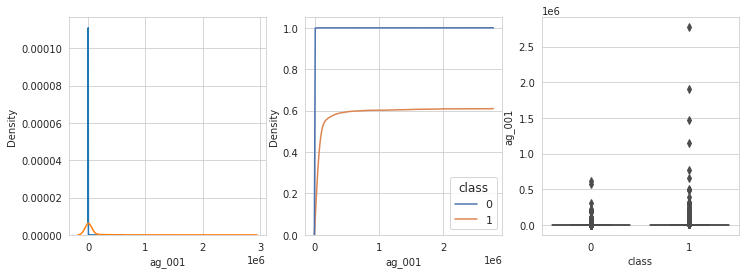

****************************************************************************************************
Feature 'ag_002' , Class Label 1, Mean: 304113.69
Standard Deviation 775884.59 

Feature 'ag_002' , Class Label 0, Mean: 1299.33
And Standard Deviation is 37794.38 


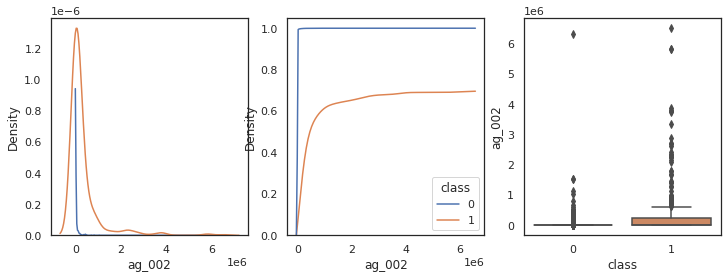

****************************************************************************************************
Feature 'ag_003' , Class Label 1, Mean: 1931983.5
Standard Deviation 3154637.12 

Feature 'ag_003' , Class Label 0, Mean: 30735.52
And Standard Deviation is 395257.65 


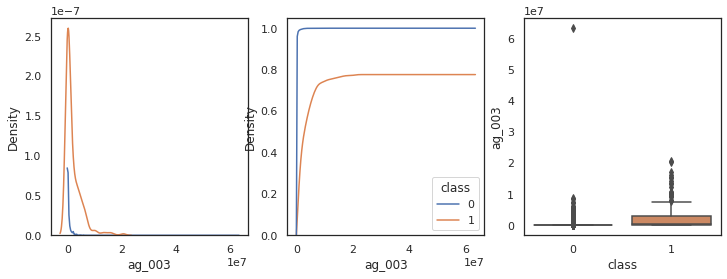

****************************************************************************************************
Feature 'ag_005' , Class Label 1, Mean: 9607893.14
Standard Deviation 9447741.2 

Feature 'ag_005' , Class Label 0, Mean: 743393.68
And Standard Deviation is 2022680.83 


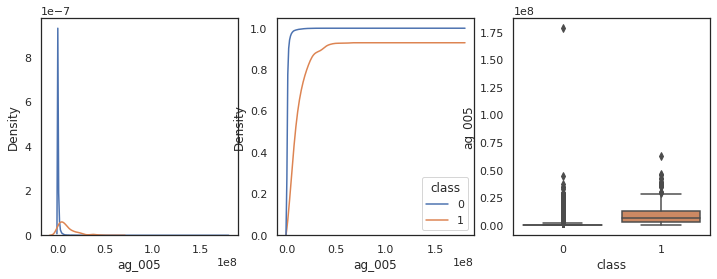

****************************************************************************************************
Feature 'ay_005' , Class Label 1, Mean: 979067.46
Standard Deviation 3693175.77 

Feature 'ay_005' , Class Label 0, Mean: 54998.11
And Standard Deviation is 573141.3 


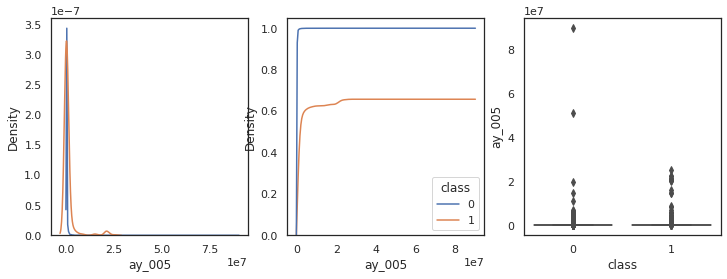

****************************************************************************************************
Feature 'ay_006' , Class Label 1, Mean: 4374257.13
Standard Deviation 9717566.57 

Feature 'ay_006' , Class Label 0, Mean: 881861.32
And Standard Deviation is 1898797.31 


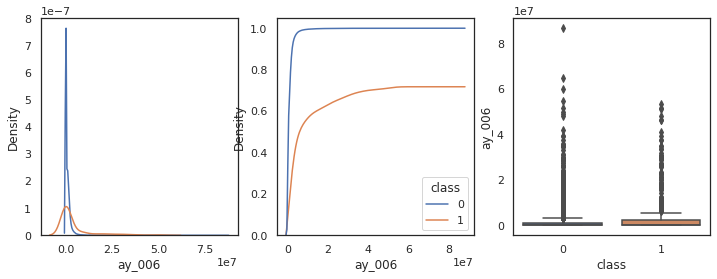

****************************************************************************************************
Feature 'ay_008' , Class Label 1, Mean: 12200750.64
Standard Deviation 14123788.66 

Feature 'ay_008' , Class Label 0, Mean: 672317.97
And Standard Deviation is 2286630.97 


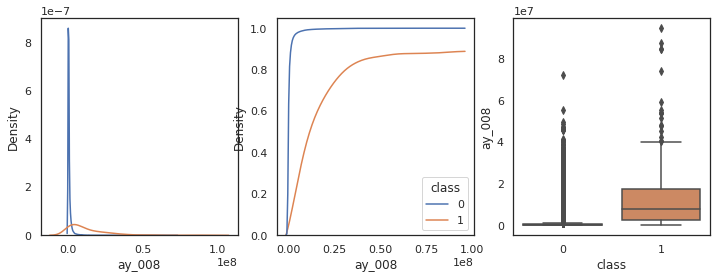

****************************************************************************************************
Feature 'ba_002' , Class Label 1, Mean: 3032203.5
Standard Deviation 2745093.79 

Feature 'ba_002' , Class Label 0, Mean: 277404.87
And Standard Deviation is 676250.7 


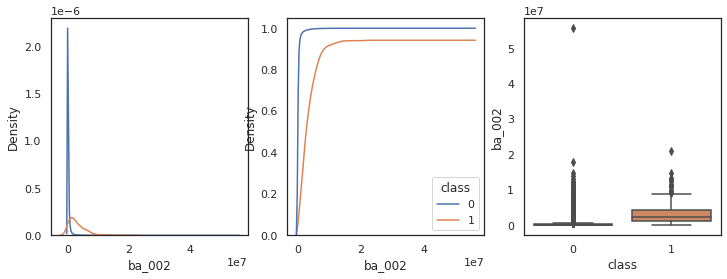

****************************************************************************************************
Feature 'ba_004' , Class Label 1, Mean: 1558247.47
Standard Deviation 1508435.09 

Feature 'ba_004' , Class Label 0, Mean: 145171.16
And Standard Deviation is 298215.95 


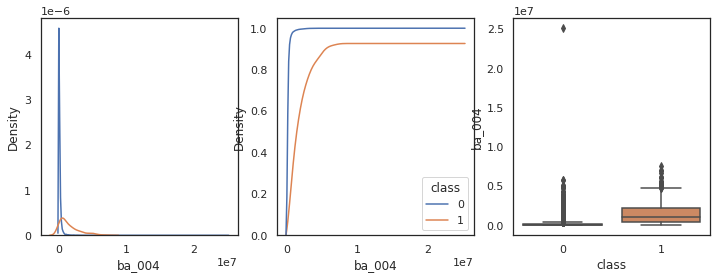

****************************************************************************************************
Feature 'ba_005' , Class Label 1, Mean: 1413168.08
Standard Deviation 1571515.84 

Feature 'ba_005' , Class Label 0, Mean: 137848.98
And Standard Deviation is 286726.61 


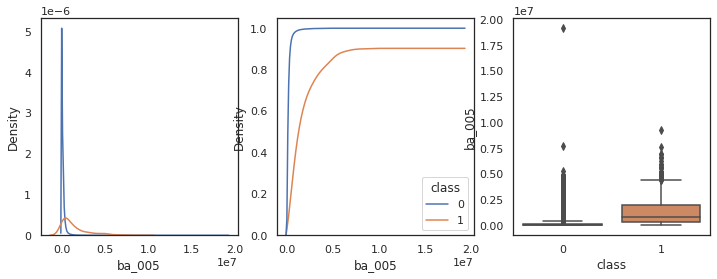

****************************************************************************************************
Feature 'cn_000' , Class Label 1, Mean: 111379.94
Standard Deviation 479969.86 

Feature 'cn_000' , Class Label 0, Mean: 456.03
And Standard Deviation is 19908.37 


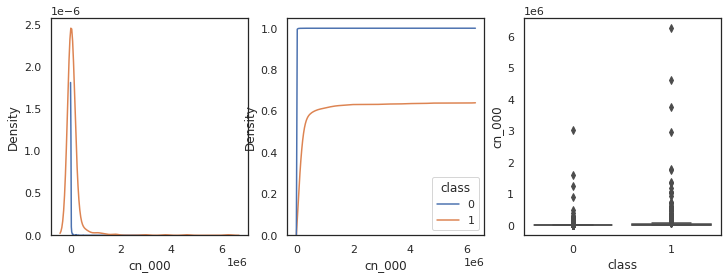

****************************************************************************************************
Feature 'cn_004' , Class Label 1, Mean: 9853482.88
Standard Deviation 10058753.3 

Feature 'cn_004' , Class Label 0, Mean: 902952.72
And Standard Deviation is 1974661.16 


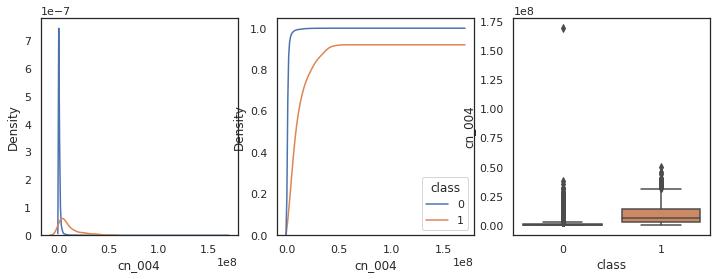

****************************************************************************************************
Feature 'cs_002' , Class Label 1, Mean: 2815018.33
Standard Deviation 3400771.5 

Feature 'cs_002' , Class Label 0, Mean: 125604.3
And Standard Deviation is 694520.03 


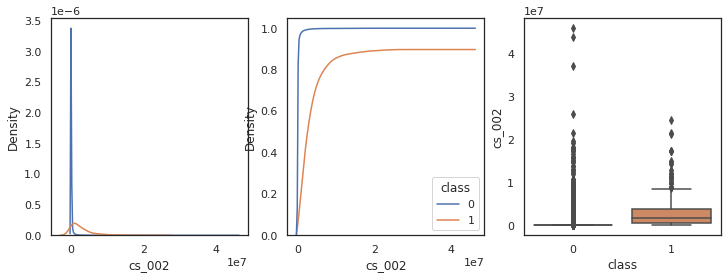

****************************************************************************************************
Feature 'ee_003' , Class Label 1, Mean: 1586760.18
Standard Deviation 1916870.8 

Feature 'ee_003' , Class Label 0, Mean: 160100.42
And Standard Deviation is 354762.97 


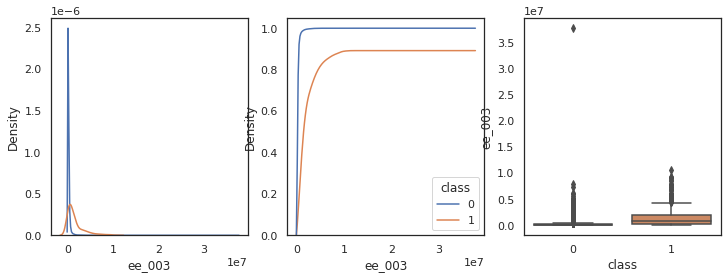

****************************************************************************************************
Feature 'ee_005' , Class Label 1, Mean: 3514924.22
Standard Deviation 4292745.52 

Feature 'ee_005' , Class Label 0, Mean: 286638.93
And Standard Deviation is 534436.48 


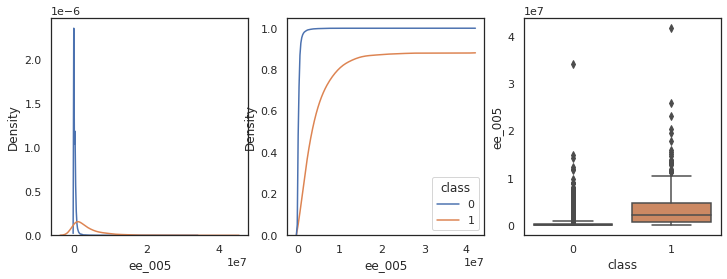

****************************************************************************************************


In [36]:
def plots(x):
    """
    This function prints Mean and Std. Deviation of points of each class,
    plots the Probability Density Function,Cumulative Density Function 
    and the Box-Plot of each feature of the given data
    """
    for n in x.columns.tolist():
        if n != 'class':

            describe_0 = x[x['class']==0].describe()
            describe_1 = x[x['class']==1].describe()

            fig,ax = plt.subplots(1,3,figsize=(12,4))
            
            print( '\033[1m' + "Feature '{}' , Class Label 1, Mean: {}".format(n , round(describe_1[n].iloc[1],2) ) )
            print( "Standard Deviation {} ".format( round(describe_1[n].iloc[2],2) ) )
            print( "\nFeature '{}' , Class Label 0, Mean: {}".format(n , round(describe_0[n].iloc[1],2) ) )
            print( "And Standard Deviation is {} ".format( round(describe_0[n].iloc[2],2) ) )
            
            sns.set_theme(style='white')
            # Plot PDF of points belonging to negative class
            sns.distplot(x[x['class']==0][n],ax=ax[0],hist=False)
            # Plot PDF of points belonging to positive class 
            sns.distplot(x[x['class']==1][n],ax=ax[0],hist=False)
            # Plot CDF of the feature values
            sns.kdeplot(data=x, x=x[n], hue="class",cumulative=True, common_norm=False, common_grid=True,ax=ax[1])
            # Plot the Box-Plot
            sns.boxplot(x=x['class'],y=x[n],ax=ax[2])
            plt.show()
            print('*'*100)

plots(top_features)

####Insights
- Plots of features ag_003, ay_008, ba_002, ba_003, ba_004, cn_004, cs_002, cs_004, ee_003 and ee_005 show us that the Lower values of the features indicate no failure in the APS component. A higher value clearly indicates an APS component failure
- Around 99% values of feature ag_001 and ay_005, where there is no failure in the APS component, are 0. 
- We can say that in these top features, a higher value may indicate a failure in the truck's Air Pressure System
-But, there are few cases when the values are higher than usual, but still do not lead to APS failure. Example: Feature ee_005

### Checking Correlation Between Top Features and Bivariate Analysis

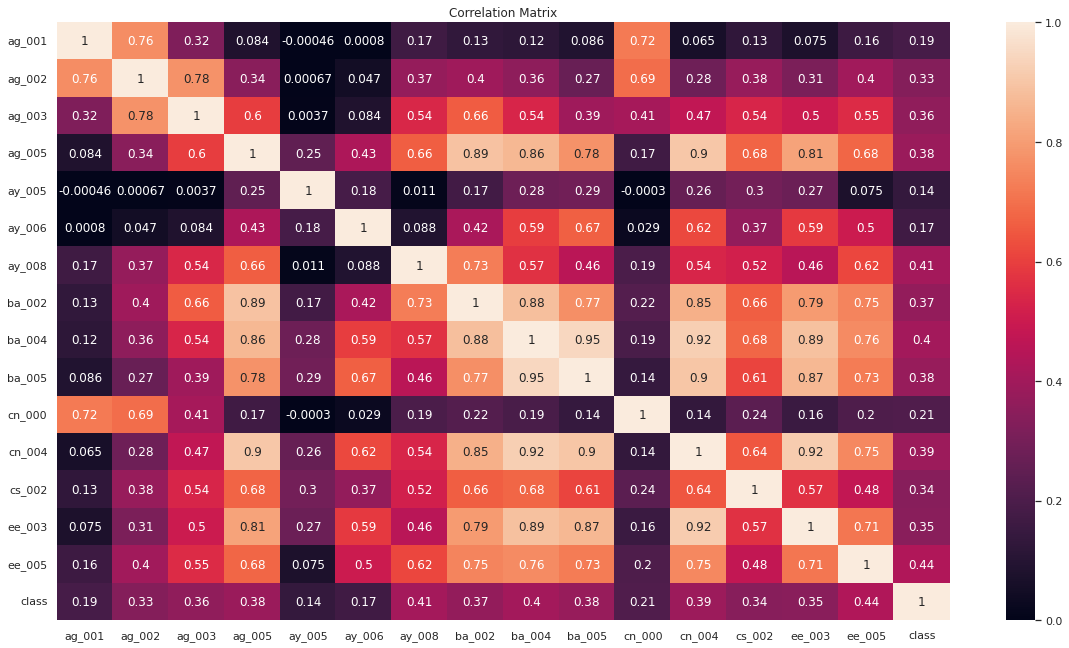

In [37]:
plt.figure(figsize=(20,11))
sns.heatmap(top_features.corr(),annot=True)
plt.title("Correlation Matrix")
plt.show()

##### Feature most uncorrelated with target

In [38]:
# Getting correlation coeffiecients of features w.r.t class
correlation_values = top_features.corr().loc['class']

# Get top 5 features
top_correlated_features = correlation_values.sort_values().iloc[:5].index.tolist()
print("Most Uncorrelated Feature is",top_correlated_features[0])

Most Uncorrelated Feature is ay_005


####Insight
-Taking into consideration only how each feature is correlated with the target variable ('class'), we can observe that feature 'ay_005' is the most uncorrelated feature among our top attributes.
-We can perform further Bivariate Analysis on how the other top 5 features vary w.r.t feature 'ay_005'.

Variation of top features w.r.t feature ay_005


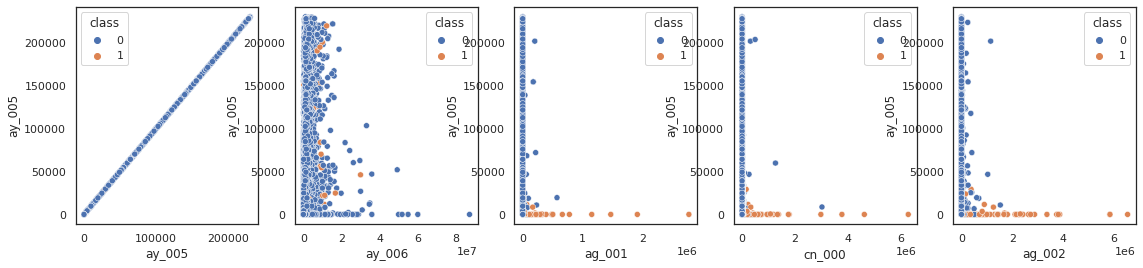

In [39]:
def plot_scatter(df,feature,percentile_value):
    """
    This function plots scatter plots between 
    all the features of the dataframe, w.r.t a given feature
    """
    fig,ax = plt.subplots(1,5,figsize=(19,4))

    # Only include the data consisting of values below the given percentile
    p = np.nanpercentile(df[feature],percentile_value)
    df = df[df[feature]<p]
    
    columns = df.columns.tolist()
    for i in range(len(columns)):
        if columns[i] !='class':
            # Plot scatterplot between 2 given features
            sns.scatterplot(x=df[columns[i]],y=df[feature],hue=df['class'],ax=ax[i])
    plt.show()


print('\033[1m'+"Variation of top features w.r.t feature",top_correlated_features[0])
plot_scatter(top_features[top_correlated_features + ['class']],top_correlated_features[0],95)

####Insight
-ag_002, ag_001, cn_000: It can be seen from the scatter plot that for any value of the other top features, there is failure in the APS component (class label = 1) when the value in feature 'ay_005' is nearly 0.

### Numerical Feature Selection

In [40]:
# Calling the function created earlier to select top features
top_feature_num = get_top(x_without_hist , y_train , 15)
print("The top features selected after Recursive Feature Elimination are: \n",top_feature_num)

Fitting estimator with 92 features.
Fitting estimator with 91 features.
Fitting estimator with 90 features.
Fitting estimator with 89 features.
Fitting estimator with 88 features.
Fitting estimator with 87 features.
Fitting estimator with 86 features.
Fitting estimator with 85 features.
Fitting estimator with 84 features.
Fitting estimator with 83 features.
Fitting estimator with 82 features.
Fitting estimator with 81 features.
Fitting estimator with 80 features.
Fitting estimator with 79 features.
Fitting estimator with 78 features.
Fitting estimator with 77 features.
Fitting estimator with 76 features.
Fitting estimator with 75 features.
Fitting estimator with 74 features.
Fitting estimator with 73 features.
Fitting estimator with 72 features.
Fitting estimator with 71 features.
Fitting estimator with 70 features.
Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 features.
Fitting estimator with 66 features.
Fitting estimator with 65 fe

In [41]:
# Create a dataframe which is a subset of our original dataset and consists of only the top features and the class label

# WE WILL BE USING THE DATA WHICH CONSISTS OF MISSING VALUES FOR OUR EDA
top_features = pd.DataFrame(data=X_train[top_feature_num],columns=top_feature_num)
top_features['class'] = y_train
top_features.head()

,al_000,am_0,ap_000,aq_000,bb_000,bj_000,bu_000,bv_000,cg_000,cj_000,cq_000,dg_000,dn_000,do_000,dx_000,class
53277,0.0,0.0,343734.0,175646.0,2622044.0,117556.0,2622044.0,2622044.0,102.000000,0.0,2622044.0,0.0,16282.0,31830.0,0.0,0
33918,0.0,0.0,120226.0,1668.0,164406.0,5138.0,164406.0,164406.0,-15.041868,2654.4,164406.0,0.0,480.0,0.0,0.0,0
38898,0.0,0.0,415554.0,268910.0,2707046.0,172732.0,2707046.0,2707046.0,42.000000,0.0,2707046.0,0.0,17572.0,39458.0,0.0,0
438,2592.0,19258.0,23046.0,532.0,42360.0,3084.0,42360.0,42360.0,6.000000,0.0,42360.0,0.0,296.0,0.0,0.0,0
12704,0.0,0.0,156862.0,6248.0,257030.0,16952.0,257030.0,257030.0,20.000000,0.0,257030.0,0.0,990.0,156.0,0.0,0


###Univariate Analysis of Numerical features

Feature 'al_000' , Class Label 1, Mean: 1340895.49
Standard Deviation 2480453.63 

Feature 'al_000' , Class Label 0, Mean: 20704.07
And Standard Deviation is 152178.69 


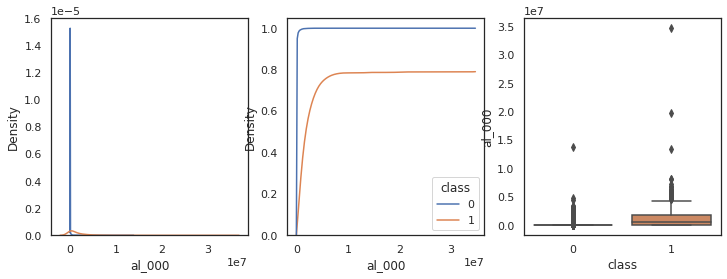

****************************************************************************************************
Feature 'am_0' , Class Label 1, Mean: 2033455.73
Standard Deviation 3567013.73 

Feature 'am_0' , Class Label 0, Mean: 30657.63
And Standard Deviation is 218867.16 


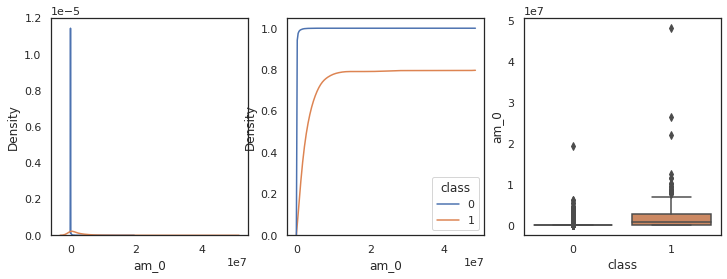

****************************************************************************************************
Feature 'ap_000' , Class Label 1, Mean: 10418706.06
Standard Deviation 8258674.36 

Feature 'ap_000' , Class Label 0, Mean: 642610.26
And Standard Deviation is 1647685.76 


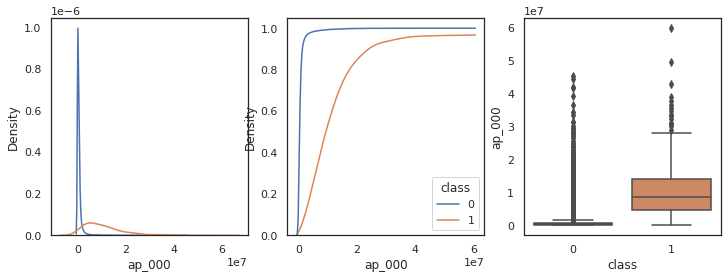

****************************************************************************************************
Feature 'aq_000' , Class Label 1, Mean: 4624301.35
Standard Deviation 3529083.8 

Feature 'aq_000' , Class Label 0, Mean: 303386.84
And Standard Deviation is 714957.03 


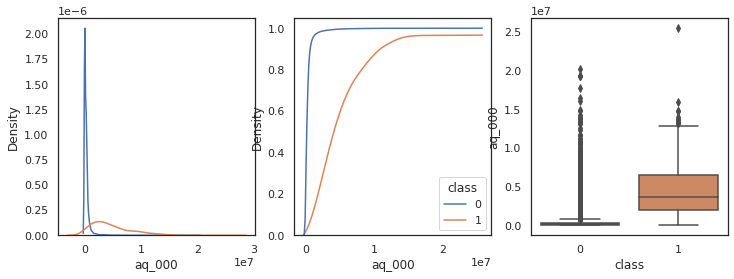

****************************************************************************************************
Feature 'bb_000' , Class Label 1, Mean: 42483312.82
Standard Deviation 26843156.5 

Feature 'bb_000' , Class Label 0, Mean: 3238774.17
And Standard Deviation is 6546152.13 


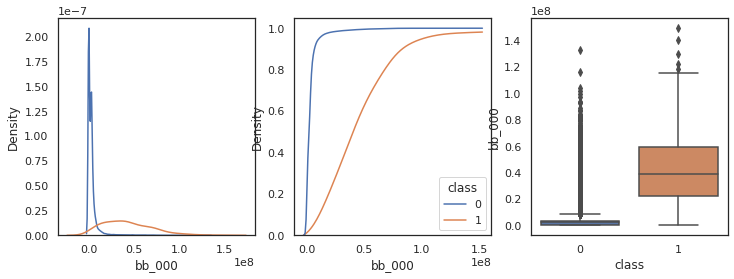

****************************************************************************************************
Feature 'bj_000' , Class Label 1, Mean: 5831982.54
Standard Deviation 4552252.37 

Feature 'bj_000' , Class Label 0, Mean: 299954.73
And Standard Deviation is 843401.3 


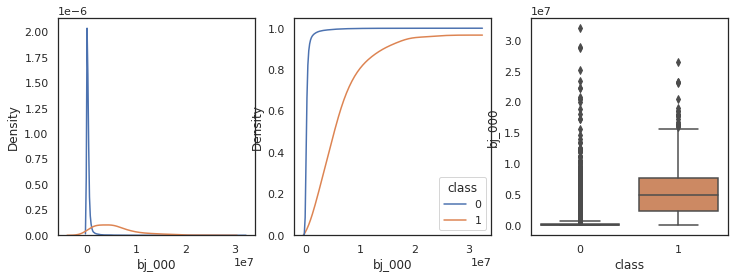

****************************************************************************************************
Feature 'bu_000' , Class Label 1, Mean: 42483301.31
Standard Deviation 26843150.88 

Feature 'bu_000' , Class Label 0, Mean: 3238773.7
And Standard Deviation is 6546151.26 


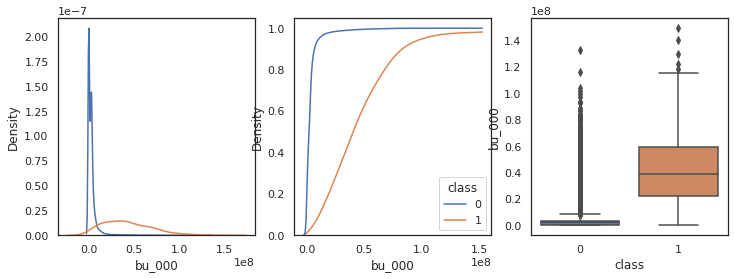

****************************************************************************************************
Feature 'bv_000' , Class Label 1, Mean: 42483311.16
Standard Deviation 26843154.49 

Feature 'bv_000' , Class Label 0, Mean: 3238774.11
And Standard Deviation is 6546152.09 


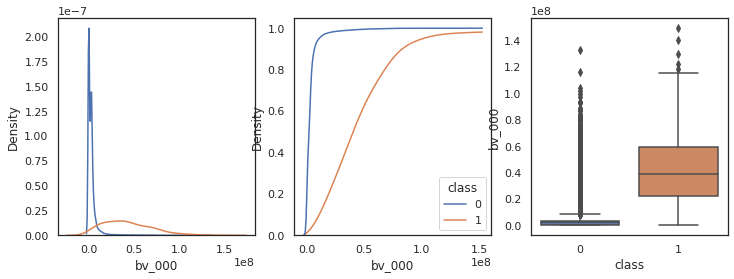

****************************************************************************************************
Feature 'cg_000' , Class Label 1, Mean: 510.83
Standard Deviation 2421.97 

Feature 'cg_000' , Class Label 0, Mean: 96.87
And Standard Deviation is 339.76 


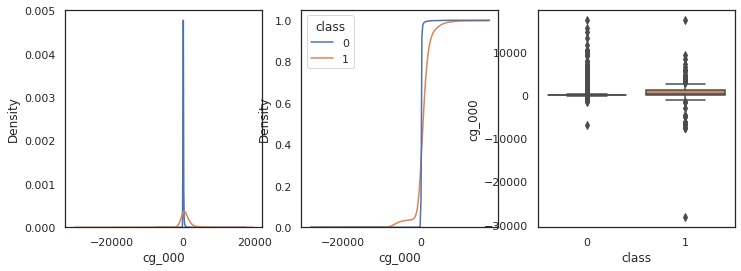

****************************************************************************************************
Feature 'cj_000' , Class Label 1, Mean: 2727741.92
Standard Deviation 5710324.58 

Feature 'cj_000' , Class Label 0, Mean: 38811.56
And Standard Deviation is 411541.88 


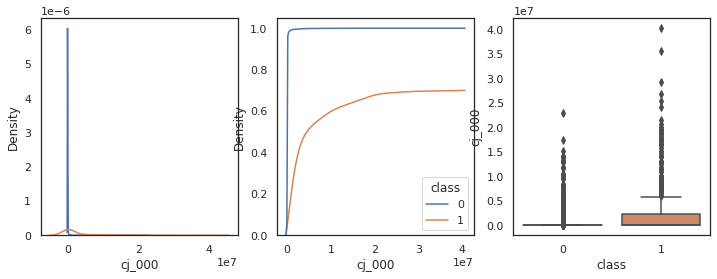

****************************************************************************************************
Feature 'cq_000' , Class Label 1, Mean: 42483301.4
Standard Deviation 26843150.87 

Feature 'cq_000' , Class Label 0, Mean: 3238774.08
And Standard Deviation is 6546152.08 


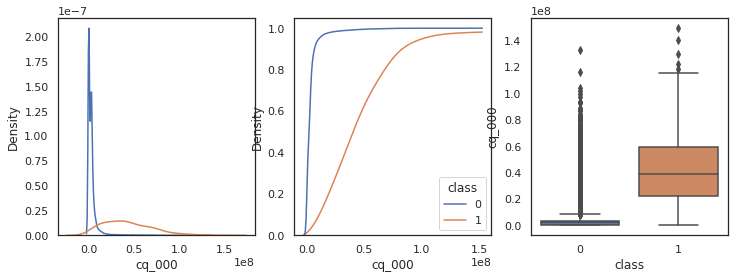

****************************************************************************************************
Feature 'dg_000' , Class Label 1, Mean: 321008.11
Standard Deviation 1488829.35 

Feature 'dg_000' , Class Label 0, Mean: 1754.75
And Standard Deviation is 79525.47 


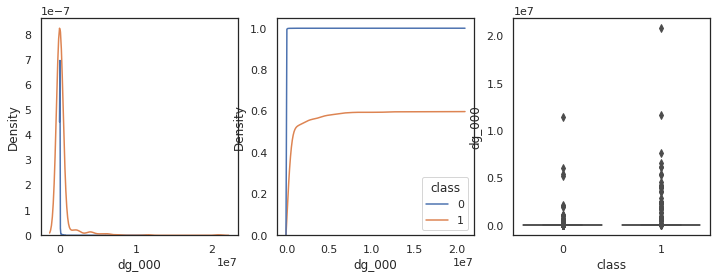

****************************************************************************************************
Feature 'dn_000' , Class Label 1, Mean: 351404.69
Standard Deviation 260146.59 

Feature 'dn_000' , Class Label 0, Mean: 23769.71
And Standard Deviation is 64204.7 


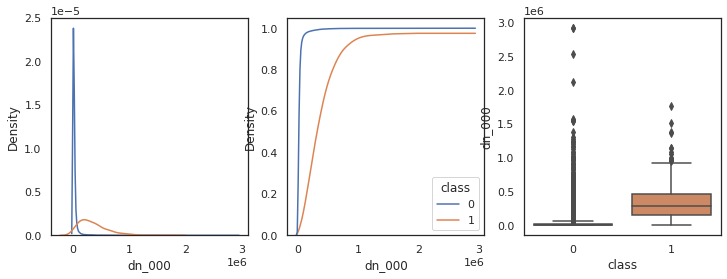

****************************************************************************************************
Feature 'do_000' , Class Label 1, Mean: 236118.25
Standard Deviation 314522.97 

Feature 'do_000' , Class Label 0, Mean: 26502.71
And Standard Deviation is 47408.19 


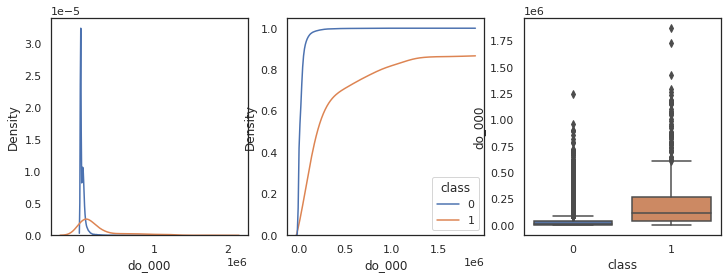

****************************************************************************************************
Feature 'dx_000' , Class Label 1, Mean: 8158247.52
Standard Deviation 15511201.75 

Feature 'dx_000' , Class Label 0, Mean: 701501.92
And Standard Deviation is 3676222.58 


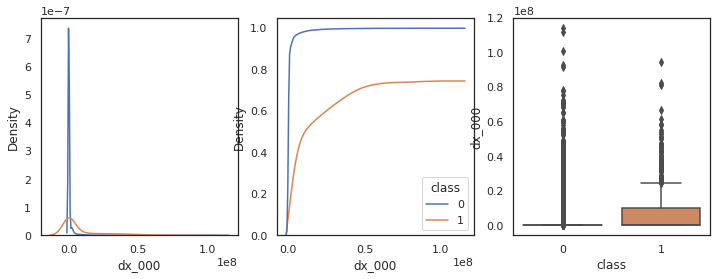

****************************************************************************************************


In [50]:
# Calling the plot function created earlier
plots(top_features)

#### Insights
- aa_000 : If there is no failure in the APS (class label = 0), about 95% of the points have a value below 0.1x1e6. A higher value than that usually indicates a failure in the APS component.
- al_000, am_000 : The values of instances of failure and non-failure of the APS component are not clearly seperable in this feature. Although points of the failure cases do have a slightly higher value.
- ap_000, aq_000, bj_000, bu_000 : Instances of failure have a higher value, compared to non-failure cases. But there are few instances of non-failure of the APS component, that see higher values in this feature.
- In all features, except dg_000, cj_000, am_0 and al_000, the higher values in the features usually indicate failure in APS component. But due to the Imbalanced nature of the data this may not be certain.

### Correlation between  Top Featues + Bivariate Analysis

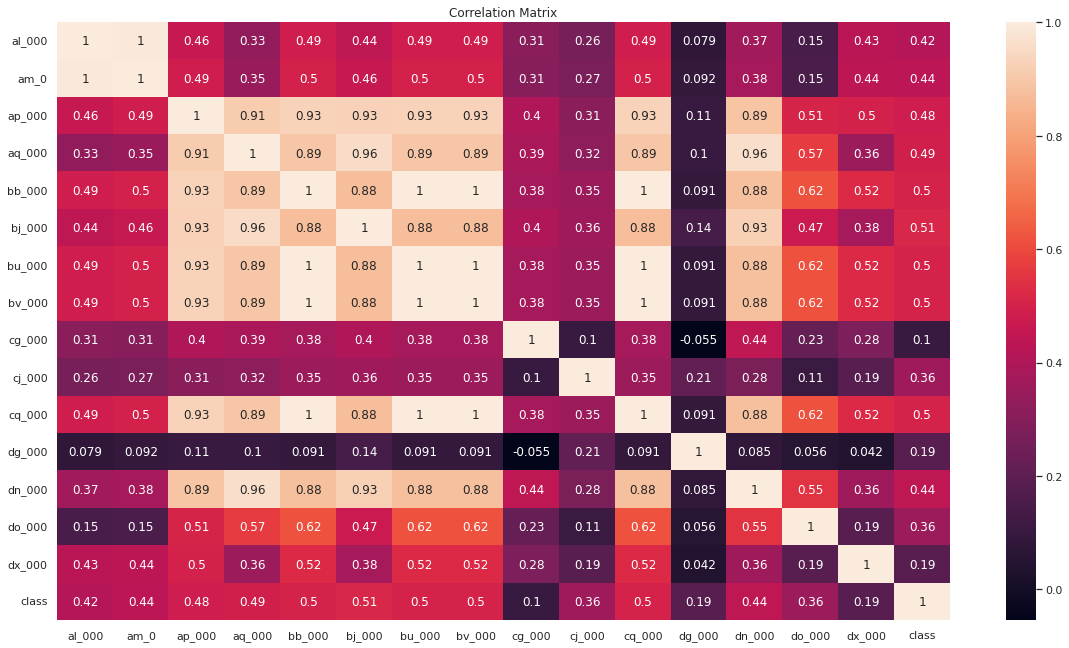

In [43]:
plt.figure(figsize=(20,11))
sns.heatmap(top_features.corr(),annot=True)
plt.title("Correlation Matrix")
plt.show()

#### Which feature is the most uncorrelated w.r.t the target variable?

In [44]:
correlation_values = top_features.corr().loc['class']

# Get top 5 features
top_correlated_features = correlation_values.sort_values().iloc[:5].index.tolist()
print("Most Uncorrelated Feature is",top_correlated_features[0])

Most Uncorrelated Feature is cg_000


#### Insight
- Taking into consideration only how each feature is correlated with the target variable ('class'), we can observe that feature 'dx_000' is the most uncorrelated feature among our top attributes.
- We can perform further Bivariate Analysis on how the other top features are, w.r.t feature 'dx_000'.

Variation of top features w.r.t feature cg_000


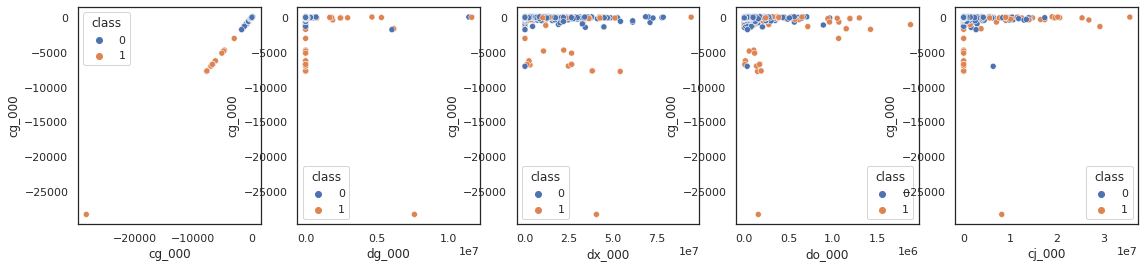

In [45]:
print('\033[1m'+"Variation of top features w.r.t feature",top_correlated_features[0])
# Calling the plot function created earlier
plot_scatter(top_features[top_correlated_features + ['class']],top_correlated_features[0],90)

## Summarized EDA:

1. The dataset consists of 60,000 datapoints and 171 features including the class label.
2. After plotting the count of each class label, we found that out of 60000 points, 59000 points belong to class 0 and the remaining 1000 points belong to class 1. We are working with a highly Imbalanced Binary Classification problem.
3. We then went forward to check for missing values in our dataset. We observed that some features have more than 70% of their values missing. We decided to remove those features from our dataset. 7 features were thuse removed.
4. There was one feature ( cd_000 ) that had a single value for all datapoints. And we decided to remove the same, since it will not add much value to our model performance.
5. For features with less than 5% missing data, the rows consisting of NA values were removed. Features with 5% - 15% missing values were imputed using median. And features with 15% - 70% missing values were imputed using a model based imputation technique.
6. There are 70 features which consist of bin information from 7 histograms. Each histogram has 10 bins. The Histogram features are the ones which have Identifiers: ['ag', 'ay', 'az', 'ba', 'cn', 'cs', 'ee']. The histogram and numerical features were seperated into two datasets and we performed Univariate and Bivariate Analysis on the top 15 features of both the datasets.
7. From performing Recursive Feature Elimination with a Random Forest Classifier, we found our top 15 features from the histogram dataset to be : ['ag_001', 'ag_002', 'ag_003', 'ay_005', 'ay_006', 'ay_008', 'ba_002', 'ba_003', 'ba_004', 'cn_000', 'cn_004', 'cs_002', 'cs_004', 'ee_003', 'ee_005'].
8. Analysis of the features show that in these top features, a higher value may indicate a failure in the truck's Air Pressure System. But, there are few cases when the values are higher than usual, but still do not lead to APS failure. Example: Feature ee_005. Univariate Analysis on the most uncorrelated feature w.r.t the target variable (ay_005) we saw that for ag_002, ag_001, cn_000 - for any value of these other top features, there is failure in the APS component (class label = 1) when the value in feature 'ay_005' is nearly 0.
9. From performing Recursive Feature Elimination with a Random Forest Classifier, we found our top 15 features from the numerical dataset to be : ['aa_000', 'al_000', 'am_0', 'ap_000', 'aq_000', 'bj_000', 'bu_000', 'bv_000', 'ci_000', 'cj_000', 'cq_000', 'dg_000', 'dn_000', 'do_000', 'dx_000'].
10. From Univariate Analysis, we saw that in all features, except dg_000, cj_000, am_0 and al_000, the higher values in the features usually indicate failure in APS component. But due to the Imbalanced nature of the data this may not be certain. Feature 'dx_000' was the most uncorrelated feature among the top features. We performed Bivariate Analysis similar to the histogram top features, and the main observation in all plots here is that for any value of the remaining features, if the feature 'dx_000' has a low value ( nearly 0 ), it MAY INDICATE that there is a failure in the APS component (class label=1)..

# Feature Engineering

### Synthetic Minority Oversampling Technique(SMOTE) For Imbalanced Data

In [56]:
def balanced_data(df,label):

  over = SMOTE(sampling_strategy=0.3)
  under = RandomUnderSampler(sampling_strategy = 0.5)
  steps = [('o',over),('u',under)]
  pipeline = Pipeline(steps=steps)
  df ,label = pipeline.fit_resample(df,label)
  return df , label

X_train , y_train = balanced_data(X_train,y_train)
print(X_train.shape)
print(y_train.value_counts())

(34869, 162)
0    23246
1    11623
Name: class, dtype: int64


#### Saving our Data

In [57]:
df.to_save = X_train.copy()
df.to_save['class'] = y_train
df.to_save.to_csv('Final_train_data.csv',index=False)

In [59]:
df.to_save = X_test.copy()
df.to_save['class'] = y_test
df.to_save.to_csv('Final_Test_data.csv',index=False)